# CGV 영화 리뷰 스크래핑 with Selenium

https://www.cgv.co.kr/

In [ ]:
# !pip install selenium
# !apt get update
# !apt install chromium-chromium-chromedriver
# !cp /usr/lib/chromium-brower/chromedriver /usr/bin

# import sys
# sys.path.insert(0, '/usr/lib/chromium-brower/chromedriver')

# from selenium import webdriver
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-dev-shm-usage')


In [20]:
import os
from selenium import webdriver
import pandas as pd
import time

from selenium.common.exceptions import NoSuchElementException
# 페이지 10개씩 넘기다가 마지막 페이지에서 멈추기 위한 라이브러리

In [2]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 50B4-87C1

 C:\Users\N\OneDrive\WorkJ\Data_Collection 디렉터리

2021-06-29  오후 12:18    <DIR>          .
2021-06-29  오후 12:18    <DIR>          ..
2021-06-29  오후 12:14    <DIR>          .ipynb_checkpoints
2021-06-08  오후 08:07        11,107,328 chromedriver.exe
2021-06-28  오후 01:52    <DIR>          Data Colletion_L
2021-06-28  오전 11:14    <DIR>          OpenAPI
2021-06-29  오후 12:18             1,554 Selenium_CGV 영화 리뷰 스크래핑 .ipynb
2021-06-28  오전 11:14    <DIR>          Web Crawling
2021-06-28  오후 03:30           379,992 데이터 수집 절차.ipynb
               3개 파일          11,488,874 바이트
               6개 디렉터리  152,748,191,744 바이트 남음


리뷰가 있는 url http://www.cgv.co.kr/movies/detail-view/?midx=84643

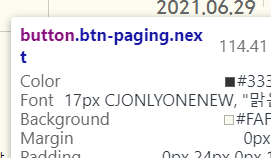

다음 페이지를 인스펙션 해보면 
* class = 'btn-paging next' 이다. 뛰어쓰기에 . 을 넣어서 위의 스샷처럼 해주길 바란다. 
    - next_button = page_ul.find_element_by_class_name('btn-paging.next')

In [49]:
def get_movie_reviews(midx, page_num=10):
    
#     midx = '84643'
   
    url = 'http://www.cgv.co.kr/movies/detail-view/?midx='+str(midx)
    wd = webdriver.Chrome('chromedriver')
    wd.get(url)
    writer_list = []
    review_list = []
    date_list = []
    
    for page_no in range(1, page_num+1):
        try:    
            page_ul = wd.find_element_by_id('paging_point')
            page_a = page_ul.find_element_by_link_text(str(page_no))
            page_a.click()
            time.sleep(1)

            writers = wd.find_elements_by_class_name('writer-name')
            writer_list += [ writer.text for writer in writers ]
            reviews = wd.find_elements_by_class_name('box-comment')
            review_list += [review.text for review in reviews]
            dates = wd.find_elements_by_class_name('day')
            date_list += [date.text for date in dates]
            print('#',end='')


            if page_no % 10 == 0:
                
                next_button = page_ul.find_element_by_class_name('btn-paging.next')
                next_button.click()
                
                time.sleep(1)
            
        except NoSuchElementException:
            break

    
    movie_review_df = pd.DataFrame({"Writer": writer_list, 
                                    "Review": review_list,
                                    "Date": date_list})
    
    return movie_review_df
        

In [50]:
midx = '84643'
get_movie_reviews(midx, 12)

##########버튼 눌러
안된거 같은데
##

,Writer,Review,Date
0,eg**38,화려한 패션 구경도하고 음악도 배우연기도 좋았습니다~,2021.06.29
1,ji**on01,재미있어요. 추천추천,2021.06.29
2,al**ys2619,최근 본 영화중에 최고였어요 내용 영상 음악 그 어느것 하나 빠지지 않았습니다,2021.06.29
3,tn**s2837,너무 재밌음 2번 봐도 될듯 추천!,2021.06.29
4,sj**hjks1,디지니영화팬으로서 무조건추천합니다,2021.06.29
...,...,...,...
67,gk**s1317,크루엘라가 되는 반전의 반전,2021.06.28
68,ca**yh,좋았어요 (크루엘라),2021.06.28
69,in**o0630,너무 재밌고 멋있게 잘 봤습니다!,2021.06.28
70,꿈쟁이,엠마스톤의 매력이 너무나도 돋보인 영화~ 의상의 화려함과 연기가 다했다!,2021.06.28


---

# 여러개를 해볼까?!  CGV 상영작 스크래핑

In [53]:
url = 'http://www.cgv.co.kr/movies/'
wd = webdriver.Chrome('chromedriver')
wd.get(url)

movie_chart = wd.find_element_by_class_name('sect-movie-chart')
contents = movie_chart.find_elements_by_class_name('box-contents')
for content in contents:
    link = content.find_element_by_tag_name('a').get_attribute('href')
    title = content.find_element_by_class_name('title').text
    percent = content.find_element_by_class_name('percent').text
    info = content.find_element_by_class_name('txt-info').text
    print(title, percent, info, link)
    print(get_movie_reviews(link[-5:],2))
    


크루엘라 예매율7.1% 2021.05.26 개봉 http://www.cgv.co.kr/movies/detail-view/?midx=84643
##        Writer                                             Review        Date
0      ly**h91                    정말 간만에 역대급 영화 봤습니다. 보는 내내 즐거웠어요  2021.06.29
1      ke**o08  재밌긴 한데 좀 산만하고, 음악 하나하나는 좋았지만 너무 크고 부조화스러운 느낌.....  2021.06.29
2    destiny운명                     시작부터 끝까지 엄청 재미있게 봤어요. 넘 재밌어요??  2021.06.29
3     Litstsfc                                       재밌었어요 크루엘라 짱  2021.06.29
4       eg**38                      화려한 패션 구경도하고 음악도 배우연기도 좋았습니다~  2021.06.29
5     ji**on01                                        재미있어요. 추천추천  2021.06.29
6   al**ys2619        최근 본 영화중에 최고였어요 내용 영상 음악 그 어느것 하나 빠지지 않았습니다  2021.06.29
7    tn**s2837                                너무 재밌음 2번 봐도 될듯 추천!  2021.06.29
8    sj**hjks1                                 디지니영화팬으로서 무조건추천합니다  2021.06.29
9     ji**3975                                       감사합니다 좋았어요 ㅎ  2021.06.29
10         민해우                   짜잔 사실은 빌런이 아니었습니다. 빌런일… 수는 있

WebDriverException: Message: chrome not reachable
  (Session info: chrome=91.0.4472.114)
